# Compare Stanford and Operator QC Criteria
Code author: Sahar H. El Abbadi
Date started: 2022-03-02
Date last edited: 2022-03-02

In [1]:
import numpy as np
import pandas as pd
import pathlib

# Setup

# Imports
from methods_data_cleaning import load_clean_data, load_meter_data
from methods_analysis import evaluate_qc

# Load clean operator data
cm_1, cm_2, cm_3, ghg_1, ghg_2, kairos_1_ls23, kairos_1_ls25, kairos_2_ls23, kairos_2_ls25, kairos_3_ls23, kairos_3_ls25 = load_clean_data()

# Load meter data
cm_meter, ghg_meter, kairos_meter = load_meter_data()

In [2]:
# Carbon Mapper QC

operator = "Carbon Mapper"
operator_meter = cm_meter

# Stage 1
stage = 1
operator_report = cm_1
cm_1_qc = evaluate_qc(operator, stage, operator_report, operator_meter)

# Stage 2
stage = 2
operator_report = cm_2
cm_2_qc = evaluate_qc(operator, stage, operator_report, operator_meter)

# Stage 3
stage = 3
operator_report = cm_3
cm_3_qc = evaluate_qc(operator, stage, operator_report, operator_meter)



In [3]:
# GHGSat

operator = "GHGSat"
operator_meter = ghg_meter

# Stage 1
stage = 1
operator_report = ghg_1
ghg_1_qc = evaluate_qc(operator, stage, operator_report, operator_meter)

# Stage 2
stage = 2
operator_report = ghg_2
ghg_2_qc = evaluate_qc(operator, stage, operator_report, operator_meter)

# Stage 3
stage = 3
operator_report = ghg_2
ghg_3_qc = evaluate_qc(operator, stage, operator_report, operator_meter)


In [4]:
# Kairos

operator = "Kairos LS23"
operator_meter = kairos_meter

# Stage 1
stage = 1
operator_report = kairos_1_ls23
kairos_1_ls23_qc = evaluate_qc(operator, stage, operator_report, operator_meter)

# Stage 2
stage = 2
operator_report = kairos_2_ls23
kairos_2_ls23_qc = evaluate_qc(operator, stage, operator_report, operator_meter)

# Stage 3
stage = 3
operator_report = kairos_3_ls23
kairos_3_ls23_qc = evaluate_qc(operator, stage, operator_report, operator_meter)

In [5]:
# Kairos

operator = "Kairos LS25"
operator_meter = kairos_meter

# Stage 1
stage = 1
operator_report = kairos_1_ls25
kairos_1_ls25_qc = evaluate_qc(operator, stage, operator_report, operator_meter)

# Stage 2
stage = 2
operator_report = kairos_2_ls25
kairos_2_ls25_qc = evaluate_qc(operator, stage, operator_report, operator_meter)

# Stage 3
stage = 3
operator_report = kairos_3_ls25
kairos_3_ls25_qc = evaluate_qc(operator, stage, operator_report, operator_meter)

In [6]:
# Combine all individual QC dataframes

all_qc = [cm_1_qc, cm_2_qc, cm_3_qc, ghg_1_qc, ghg_2_qc, ghg_3_qc, kairos_1_ls23_qc, kairos_2_ls23_qc, kairos_3_ls23_qc, kairos_1_ls25_qc, kairos_2_ls25_qc, kairos_3_ls25_qc]

all_qc = pd.concat(all_qc)
all_qc.to_csv(pathlib.PurePath('03_results', 'qc_comparison', 'all_qc.csv'))

Text(0.5, 0, 'Operator')

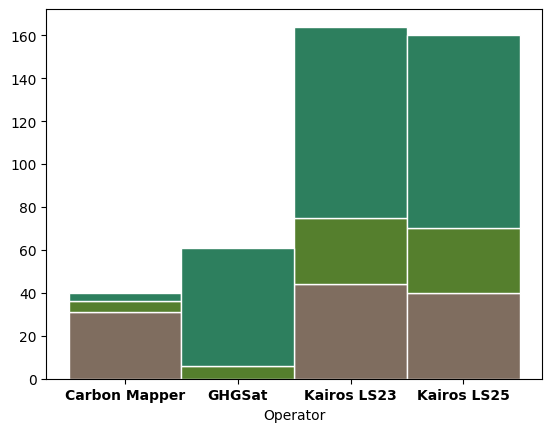

In [28]:
from plot_methods import abbreviate_op_name
import matplotlib.pyplot as plt

all_qc = [cm_1_qc, cm_2_qc, cm_3_qc, ghg_1_qc, ghg_2_qc, ghg_3_qc, kairos_1_ls23_qc, kairos_2_ls23_qc, kairos_3_ls23_qc, kairos_1_ls25_qc, kairos_2_ls25_qc, kairos_3_ls25_qc]

all_qc = pd.concat(all_qc)
all_qc.to_csv(pathlib.PurePath('03_results', 'qc_comparison', 'all_qc.csv'))

# Plot

category = ['fail_stanford_only', 'fail_all_qc', 'fail_operator_only']
stage = 1
n_operators = 4 # number of operators
operators = ['Carbon Mapper', 'GHGSat', 'Kairos LS23', 'Kairos LS25']
# Determine values for each group, alphabetical order of operators: "Carbon Mapper, GHGSat, Kairos"

fail_operator = np.zeros(n_operators)
fail_stanford = np.zeros(n_operators)
fail_all = np.zeros(n_operators)

# Height of bars

for i in range(len(operators)): # for go through fail stanford only
    op_ab = abbreviate_op_name(operators[i])
    operator_qc = all_qc.loc[all_qc.operator == op_ab]
    operator_stage_qc = operator_qc.loc[operator_qc.stage == stage]
    # operator_qc_stage = operator_qc.loc[all_qc.stage == stage]
    fail_operator[i] = operator_stage_qc.fail_operator_only
    fail_stanford[i] = operator_stage_qc.fail_stanford_only
    fail_all[i] = operator_stage_qc.fail_all_qc

barWidth = 1

# height of fail_operator + fail_all
bars = np.add(fail_operator, fail_all).tolist()

# The position of the bars on the x-axis
r = [0,1,2,3]

# Create brown bars
plt.bar(r, fail_operator, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the first ones
plt.bar(r, fail_all, bottom=fail_operator, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, fail_stanford, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)

# Custom X axis
plt.xticks(r, operators, fontweight='bold')
plt.xlabel("Operator")

In [9]:
from plot_methods import abbreviate_op_name
stage = 1
category = ['fail_stanford_only', 'fail_all_qc', 'fail_operator_only']
op_ab = abbreviate_op_name('Carbon Mapper')

for i in range(len(category)): # for go through fail stanford only
    for operator in operators: # Carbon Mapper
        op_ab = abbreviate_op_name(operator)
        operator_qc = all_qc.loc[all_qc.operator == op_ab]